In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [13]:
dataset = '/kaggle/input/data-set/keypoint.csv'
# model_save_path = '/kaggle/working/model/slr_model.hdf5'
model_save_path = '/kaggle/working/model/slr_model.weights.h5'
tflite_save_path = '/kaggle/working/model/slr_model.tflite'

# Set number of classes

In [14]:
NUM_CLASSES = 24

# Dataset reading

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [18]:
y_dataset

array([ 0,  0,  0, ..., 16, 16, 16], dtype=int32)

# Model building

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [20]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,334 (5.21 KB)

 Trainable params: 1,334 (5.21 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=True) 
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [22]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0779 - loss: 3.1313
Epoch 1: saving model to /kaggle/working/model/slr_model.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0781 - loss: 3.1305 - val_accuracy: 0.1580 - val_loss: 2.7475
Epoch 2/1000
118/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1489 - loss: 2.7487
Epoch 2: saving model to /kaggle/working/model/slr_model.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1517 - loss: 2.7316 - val_accuracy: 0.2893 - val_loss: 2.2739
Epoch 3/1000
118/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2300 - loss: 2.3652
Epoch 3: saving model to /kaggle/working/model/slr_model.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2330 - loss: 2.3503 - val_accuracy: 0.5182 - val_loss: 1.8370
Epoch 4/1000
119/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 2.0472
Epoch 4: saving model to /kaggle/working/model/slr_model.weights.h5
141/141 ━━━━━━━━━━━━━━━

In [24]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9595 - loss: 0.2970


In [26]:
# Loading the saved model
model.load_weights('/kaggle/working/model/slr_model.weights.h5')
print("Poids du modèle chargés avec succès.")

Poids du modèle chargés avec succès.


In [27]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[1.33079378e-33 4.18559801e-18 6.25940202e-11 9.16449196e-43
 0.00000000e+00 5.57082868e-22 8.13434005e-01 1.28328905e-01
 1.39347129e-22 0.00000000e+00 4.82675942e-31 0.00000000e+00
 0.00000000e+00 2.55029570e-12 1.90427633e-39 3.52262969e-30
 0.00000000e+00 0.00000000e+00 5.81671931e-02 1.07568205e-23
 0.00000000e+00 0.00000000e+00 6.99109805e-05 1.43902365e-34]
6


# Confusion matrix

In [28]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


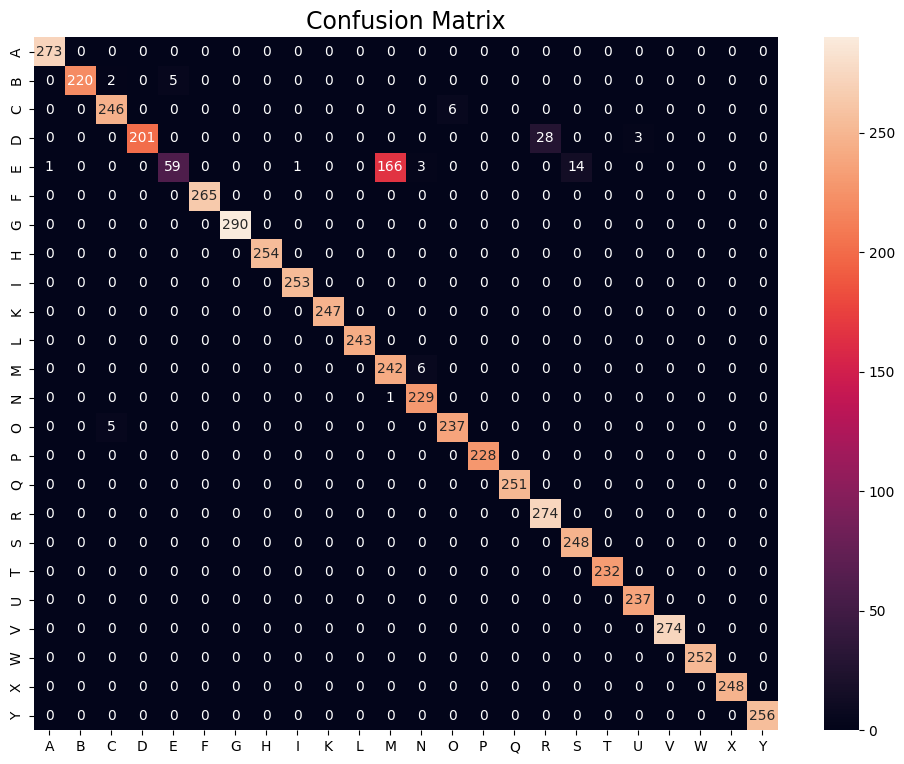

Accuracy   : 0.9598333333333333


In [29]:
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
prediction = model.predict(X_test)
y_pred = np.argmax(prediction, axis=1)


cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
plt.subplots(figsize=(12, 9))

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix',fontsize=17)
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)


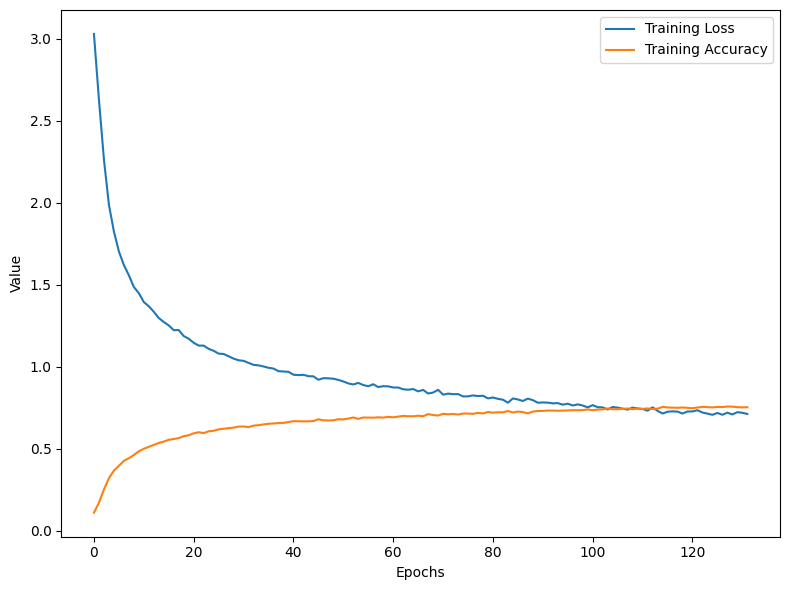

In [30]:
# Extract the loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create a figure for loss and accuracy
plt.figure(figsize=(8, 6))

# Plot the loss curve
plt.plot(loss, label='Training Loss')
plt.plot(accuracy, label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

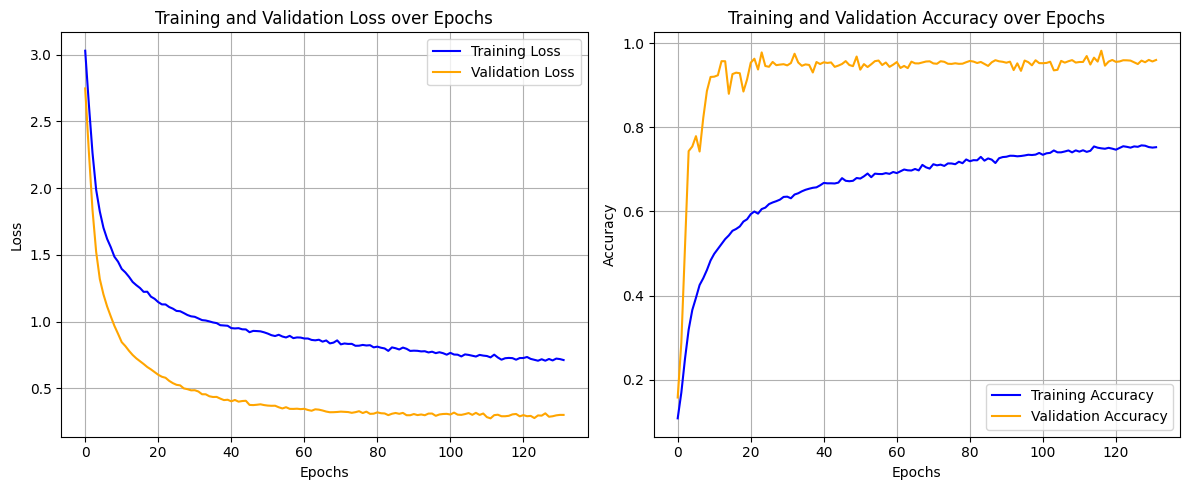

In [31]:
import matplotlib.pyplot as plt

# Extract the metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a figure for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the loss curves
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot the accuracy curves
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# Convert to model for Tensorflow-Lite

In [32]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [33]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmpijp1idsm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)
Captures:
  135372244258128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135372244257600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135372244255312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135372244259360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135372244261824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135372244257072: TensorSpec(shape=(), dtype=tf.resource, name=None)


7424